In [ ]:
from datetime import datetime

protection = datetime(2023, 6, 9)
today = datetime.now()

print(f'До защиты {protection - today}')

До защиты 13 days, 2:36:05.316085


**ГРАФИК РАССЕНИЯ**

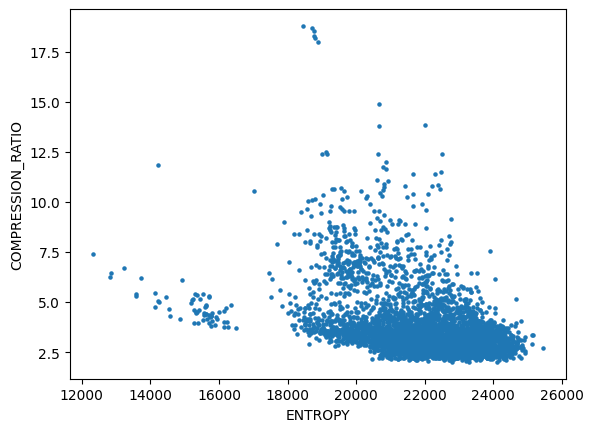

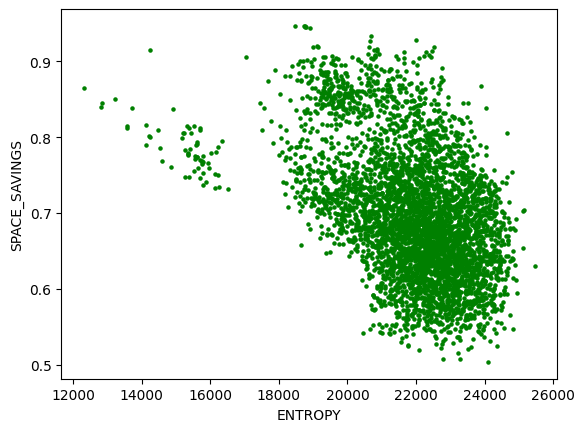

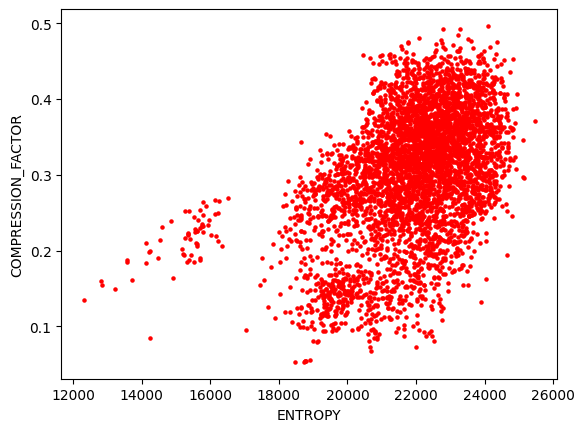

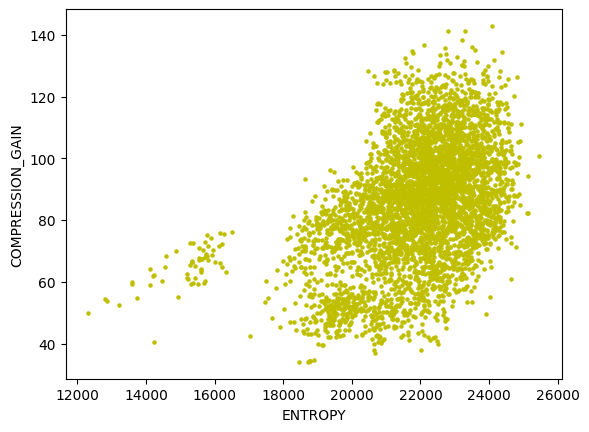

In [11]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hamzreg/bmstu-diploma/main/src/scripts/stat/vm2/stat.csv')

df.plot.scatter(x = 'ENTROPY', y = 'COMPRESSION_RATIO', s = 5);
df.plot.scatter(x = 'ENTROPY', y = 'SPACE_SAVINGS', s = 5, c = 'g');
df.plot.scatter(x = 'ENTROPY', y = 'COMPRESSION_FACTOR', s = 5, c = 'r');
df.plot.scatter(x = 'ENTROPY', y = 'COMPRESSION_GAIN', s = 5, c = 'y');